<a href="https://colab.research.google.com/github/subhajitchou/Car-Number-Plate-Recognition-/blob/main/Car_Number_plate_detection_Subhajit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import os
import glob

In [2]:
IMG_SIZE = 224

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_dir = '/content/drive/MyDrive/AI/car/images'
data_path = os.path.join(img_dir)
files = glob.glob(data_path)
files.sort()
X = []
for img in files:
    img = cv2.imread(img)
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    X.append(np.array(img))

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMG_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMG_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMG_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMG_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
path = '/content/drive/MyDrive/AI/car/annotations'
text_files = ['/content/drive/MyDrive/AI/car/annotations'+ i for i in sorted(os.listdir(path))]
y = []
for i in text_files:
    y.append(resizeannotation(i))

In [ ]:
resizeannotation("/content/drive/MyDrive/AI/car/annotations/Cars0.xml")

[187, 144, 101, 104]

In [ ]:
y[:5]

array([[0.73333333, 0.56470588, 0.39607843, 0.40784314],
       [0.57254902, 0.56470588, 0.29411765, 0.45098039],
       [0.6627451 , 0.57647059, 0.30588235, 0.01568627],
       [0.46666667, 0.42745098, 0.38431373, 0.37254902],
       [0.5254902 , 0.64313725, 0.36470588, 0.58823529]])

In [ ]:
np.array(X).shape

(433, 224, 224, 3)

In [ ]:
np.array(y).shape

(433, 4)

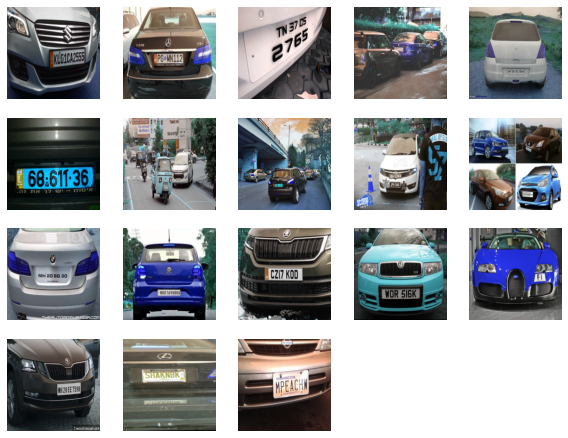

In [ ]:
plt.figure(figsize=(10,20))

for i in range(0,18):
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

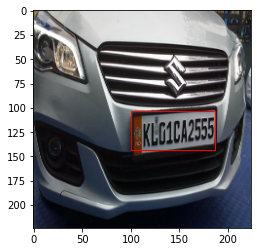

In [ ]:
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(255, 0, 0))
plt.imshow(image)
plt.show()

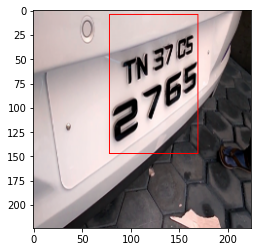

In [ ]:
image = cv2.rectangle(X[2],(y[2][0],y[2][1]),(y[2][2],y[2][3]),(255, 0, 0))
plt.imshow(image)
plt.show()

In [ ]:
# Transforming the array to numpy array
X = np.array(X)
y = np.array(y)

In [ ]:
X = X/255
y = y/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5)

In [ ]:
X_train.shape

(173, 224, 224, 3)

In [ ]:
X_test.shape

(87, 224, 224, 3)

In [ ]:
from keras.models import Sequential

from keras.layers import Dense, Flatten, Dropout

from keras.applications.vgg19 import VGG19

In [ ]:
model = Sequential()
model.add(VGG19(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 260       
Total params: 23,260,804
Trainable params: 3,236,420
Non-trainable params: 20,024,384
__________________________________

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
6/6 [==============================] - 2s 235ms/step - loss: 0.1120 - accuracy: 0.4162 - val_loss: 0.0536 - val_accuracy: 0.5954
Epoch 2/100
6/6 [==============================] - 1s 153ms/step - loss: 0.0462 - accuracy: 0.6243 - val_loss: 0.0550 - val_accuracy: 0.1676
Epoch 3/100
6/6 [==============================] - 1s 153ms/step - loss: 0.0297 - accuracy: 0.3642 - val_loss: 0.0335 - val_accuracy: 0.5954
Epoch 4/100
6/6 [==============================] - 1s 152ms/step - loss: 0.0151 - accuracy: 0.5376 - val_loss: 0.0182 - val_accuracy: 0.6532
Epoch 5/100
6/6 [==============================] - 1s 153ms/step - loss: 0.0095 - accuracy: 0.6590 - val_loss: 0.0200 - val_accuracy: 0.3468
Epoch 6/100
6/6 [==============================] - 1s 156ms/step - loss: 0.0074 - accuracy: 0.6243 - val_loss: 0.0185 - val_accuracy: 0.6647
Epoch 7/100
6/6 [==============================] - 1s 155ms/step - loss: 0.0054 - accuracy: 0.6127 - val_loss: 0.0148 - val_accuracy: 0.7803
Epoch 8/100
6

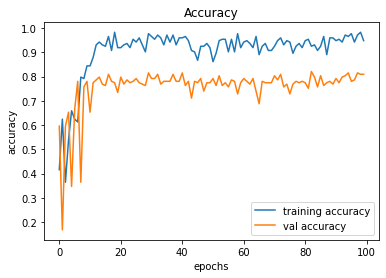

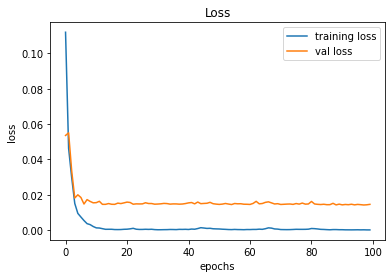

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 71ms/step - loss: 0.0061 - accuracy: 0.8966


[0.006066775880753994, 0.8965517282485962]

In [ ]:
model.save("number_plate_detection.h5")

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[:5]

array([[0.5820943 , 0.5072764 , 0.30285445, 0.38578126],
       [0.60996246, 0.6010708 , 0.41592172, 0.41726238],
       [0.65895706, 0.52246135, 0.20502369, 0.38296962],
       [0.40600708, 0.62335336, 0.28396165, 0.544265  ],
       [0.5600158 , 0.5355854 , 0.38180658, 0.4143504 ]], dtype=float32)

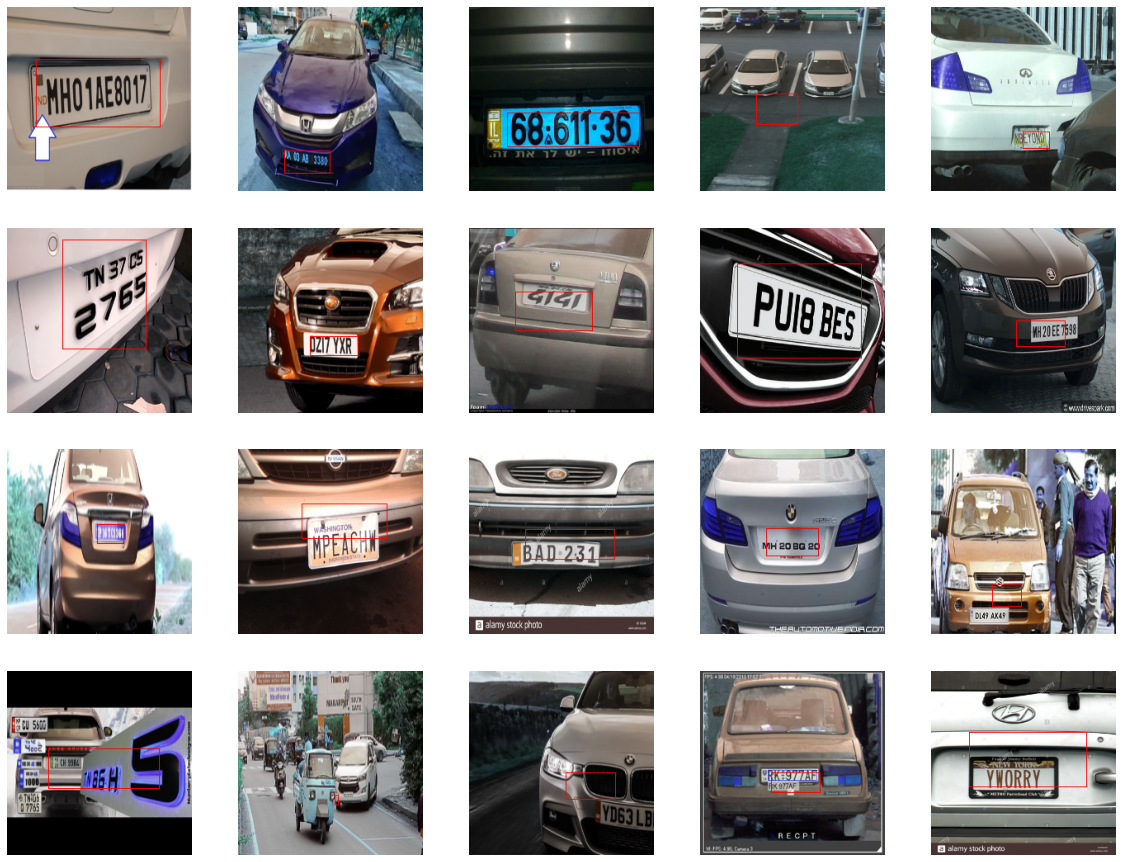

In [ ]:
plt.figure(figsize=(20,40))
for i in range(20,40) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = predictions[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(255, 0, 0))
    plt.imshow(image)